## Imports

In [1]:
import numpy as np 
import pandas as pd

## Loading & preparing data

Load data from TSV files

In [2]:
# Data Table TSVs file path
TA2A_TA1B_0321_RRS_SelectQuestionsFromGSS_file_path = '../data/RunDataTable-TA2A-TA1B-0321-RRS-SelectQuestionsFromGSS.tsv'
TA2A_TA1B_0331_RR_R1_file_path = '../data/RunDataTable-TA2A-TA1B-0331-RR-R1.tsv'
TA2A_TA1B_0351_RR_Journal_file_path = '../data/RunDataTable-TA2A-TA1B-0351-RR-Journal.tsv'
TA2A_TA1B_0351_RR_Survey_file_path = '../data/RunDataTable-TA2A-TA1B-0351-RR-Survey.tsv'
# Relationship Data Table TSVs file path
Relationship_TA2A_TA1B_0351_RR_Survey_file_path = '../data/RelationshipDataTable-TA2A-TA1B-0351-RR-Survey.tsv'
Relationship_TA2A_TA1B_0331_RR_R1_file_path = '../data/RelationshipDataTable-TA2A-TA1B-0331-RR-R1.tsv'


In [3]:
TA2A_TA1B_0321_df = pd.read_csv(TA2A_TA1B_0321_RRS_SelectQuestionsFromGSS_file_path ,delimiter='\t', encoding='utf-8')
TA2A_TA1B_0321_df.head()

,Timestep,VariableName,EntityIdx,Value,Notes
0,Day 401,factor_1,agent51,0.093676,Q1-TA2A-TA1B-0321-RRS-SelectQuestionsFromGSS
1,Day 401,factor_1,agent14,0.364795,Q1-TA2A-TA1B-0321-RRS-SelectQuestionsFromGSS
2,Day 401,factor_1,agent42,0.917809,Q1-TA2A-TA1B-0321-RRS-SelectQuestionsFromGSS
3,Day 401,factor_1,agent2,0.132705,Q1-TA2A-TA1B-0321-RRS-SelectQuestionsFromGSS
4,Day 401,factor_1,agent53,0.709643,Q1-TA2A-TA1B-0321-RRS-SelectQuestionsFromGSS


In [4]:
# check on Value column because I want ot aggregate on this feature
TA2A_TA1B_0321_df.Value.describe()

count    552.000000
mean      11.238132
std       26.554466
min        0.000421
25%        0.046694
50%        0.407269
75%        0.858286
max      100.000000
Name: Value, dtype: float64

We need to reorganize data to put variables as columns

In [5]:
# Value feature is float, then I can reorganize data as follows
p_TA2A_TA1B_0321_df = TA2A_TA1B_0321_df.pivot_table(values='Value', index=['Timestep', 'EntityIdx'], columns='VariableName')

In [6]:
p_TA2A_TA1B_0321_df.head()

VariableName        confusion  excitement  factor_1  factor_2  factor_3  \
Timestep EntityIdx                                                        
Day 1000 agent0      0.010006    0.019052  0.116010  0.180941  0.926002   
         agent1      0.056395    0.001969  0.044566  0.098736  0.402809   
         agent11     0.015772    0.015933  0.034958  0.827217  0.453727   
         agent12     0.205485    0.021382  0.791923  0.289115  0.171501   
         agent14     0.027349    0.002211  0.364795  0.677890  0.775698   

VariableName        happiness  
Timestep EntityIdx             
Day 1000 agent0     31.718917  
         agent1     35.484681  
         agent11    96.683504  
         agent12    48.863022  
         agent14    97.541209

We apply the same approach for all data tables

In [7]:
TA2A_TA1B_0351_RR_Journal_df = pd.read_csv(TA2A_TA1B_0351_RR_Journal_file_path, delimiter='\t', encoding='utf-8')
TA2A_TA1B_0351_RR_Journal_df.head()

,Timestep,VariableName,EntityIdx,Value,Notes
0,Day 375,group_work_percent,agent0,0.000000,Q5
1,Day 375,worked_for_group,agent0,NaN,Q6
2,Day 375,individual_work_percent,agent0,1.000000,Q7
3,Day 375,group_work_percent,agent1,0.000000,Q5
4,Day 375,worked_for_group,agent1,NaN,Q6


In [8]:
# replace NaN with 0 in column Value
for index, row in TA2A_TA1B_0351_RR_Journal_df.iterrows():
    value = row['Value']
    variable_name = row['VariableName']
    if variable_name == 'worked_for_group':
        if value is np.nan:
            new_value = 0
        else:
            new_value = 1   
        TA2A_TA1B_0351_RR_Journal_df['Value'][index] = new_value

TA2A_TA1B_0351_RR_Journal_df = TA2A_TA1B_0351_RR_Journal_df.astype({'Value':float})
TA2A_TA1B_0351_RR_Journal_df.Value.describe()

count    1425.000000
mean        0.546667
std         0.394992
min         0.000000
25%         0.192336
50%         0.620565
75%         1.000000
max         1.000000
Name: Value, dtype: float64

In [9]:
p_TA2A_TA1B_0351_RR_Journal_df = TA2A_TA1B_0351_RR_Journal_df.pivot_table(values='Value', index=['Timestep','EntityIdx'], columns='VariableName')
p_TA2A_TA1B_0351_RR_Journal_df = p_TA2A_TA1B_0351_RR_Journal_df.astype({'worked_for_group':int})
p_TA2A_TA1B_0351_RR_Journal_df.head()

VariableName        group_work_percent  individual_work_percent  \
Timestep EntityIdx                                                
Day 375  agent0               0.000000                 1.000000   
         agent1               0.000000                 1.000000   
         agent10              0.000000                 1.000000   
         agent11              0.407771                 0.592229   
         agent13              0.305135                 0.694865   

VariableName        worked_for_group  
Timestep EntityIdx                    
Day 375  agent0                    0  
         agent1                    0  
         agent10                   0  
         agent11                   1  
         agent13                   1

In [10]:
TA2A_TA1B_0351_RR_Survey_df = pd.read_csv(TA2A_TA1B_0351_RR_Survey_file_path, delimiter='\t', encoding='utf-8')
TA2A_TA1B_0351_RR_Survey_df.head()

,Timestep,VariableName,EntityIdx,Value,Notes
0,Day 375,groups,agent0,none,Q1
1,Day 375,groups,agent7,none,Q1
2,Day 375,groups,agent1,none,Q1
3,Day 375,groups,agent13,group4,Q1
4,Day 375,groups,agent10,none,Q1


In [11]:
# replace NaN with 0 in column Value
for index, row in TA2A_TA1B_0351_RR_Survey_df.iterrows():
    value = row['Value']
    if value == 'none':
        new_value = '0.0'
    else:
        new_value = '1.0'
    TA2A_TA1B_0351_RR_Survey_df['Value'][index] = new_value

TA2A_TA1B_0351_RR_Survey_df.Value.describe()
TA2A_TA1B_0351_RR_Survey_df.head()

,Timestep,VariableName,EntityIdx,Value,Notes
0,Day 375,groups,agent0,0.0,Q1
1,Day 375,groups,agent7,0.0,Q1
2,Day 375,groups,agent1,0.0,Q1
3,Day 375,groups,agent13,1.0,Q1
4,Day 375,groups,agent10,0.0,Q1


In [12]:
TA2A_TA1B_0351_RR_Survey_df = TA2A_TA1B_0351_RR_Survey_df.astype({'Value':float})
TA2A_TA1B_0351_RR_Survey_df.head()

,Timestep,VariableName,EntityIdx,Value,Notes
0,Day 375,groups,agent0,0.0,Q1
1,Day 375,groups,agent7,0.0,Q1
2,Day 375,groups,agent1,0.0,Q1
3,Day 375,groups,agent13,1.0,Q1
4,Day 375,groups,agent10,0.0,Q1


In [13]:
p_TA2A_TA1B_0351_RR_Survey_df = TA2A_TA1B_0351_RR_Survey_df.pivot_table(values='Value', index=['Timestep','EntityIdx'], columns='VariableName')
p_TA2A_TA1B_0351_RR_Survey_df = p_TA2A_TA1B_0351_RR_Survey_df.astype({'groups':int})
p_TA2A_TA1B_0351_RR_Survey_df.head()

VariableName        groups
Timestep EntityIdx        
Day 375  agent0          0
         agent1          0
         agent10         0
         agent11         1
         agent13         1

In [14]:
TA2A_TA1B_0331_RR_R1_df = pd.read_csv(TA2A_TA1B_0331_RR_R1_file_path, delimiter='\t', encoding='utf-8')
TA2A_TA1B_0331_RR_R1_df.head()

,Timestep,VariableName,EntityIdx,Value,Notes
0,Day 375,fixed_income,agent0,0.600000,NaN
1,Day 375,fixed_expense,agent0,0.900000,NaN
2,Day 375,job_income,agent0,0.900000,NaN
3,Day 375,fixed_income,agent7,0.600000,NaN
4,Day 375,fixed_expense,agent7,1.400000,NaN


In [15]:
TA2A_TA1B_0331_RR_R1_df.Value.describe()

count         2336
unique         139
top       0.600000
freq           507
Name: Value, dtype: object

In [16]:
# Value is object because it contains mixed values as fractions as string and float.
# For this reason it's important to change fractions to floats
from fractions import Fraction
for index, row in TA2A_TA1B_0331_RR_R1_df.iterrows():
    value = row['Value']
    new_value = float(Fraction(value))
    TA2A_TA1B_0331_RR_R1_df['Value'][index] = new_value

TA2A_TA1B_0331_RR_R1_df = TA2A_TA1B_0331_RR_R1_df.astype({'Value':float})
TA2A_TA1B_0331_RR_R1_df.head()

,Timestep,VariableName,EntityIdx,Value,Notes
0,Day 375,fixed_income,agent0,0.6,NaN
1,Day 375,fixed_expense,agent0,0.9,NaN
2,Day 375,job_income,agent0,0.9,NaN
3,Day 375,fixed_income,agent7,0.6,NaN
4,Day 375,fixed_expense,agent7,1.4,NaN


In [17]:
# The column Value now is of type float, then I can aggregate
p_TA2A_TA1B_0331_RR_R1_df = TA2A_TA1B_0331_RR_R1_df.pivot_table(values='Value', index=['Timestep', 'EntityIdx'], columns='VariableName')
p_TA2A_TA1B_0331_RR_R1_df.head()

VariableName        confusion  contest_expense  contest_income  \
Timestep EntityIdx                                               
Day 375  agent0           0.1              NaN             NaN   
         agent1           0.1              NaN             NaN   
         agent10          0.1              NaN             NaN   
         agent11          0.1              NaN             NaN   
         agent13          0.1              NaN             NaN   

VariableName        distribution_income  excitement  fixed_expense  \
Timestep EntityIdx                                                   
Day 375  agent0                     NaN         0.1            0.9   
         agent1                     NaN         0.1            0.9   
         agent10                    NaN         0.1            1.4   
         agent11                    NaN         0.1            NaN   
         agent13                   0.81         0.1            1.3   

VariableName        fixed_income  happiness  job_income  
Timestep EntityIdx                                       
Day 375  agent0              0.6       0.31        0.90  
         agent1              0.6       0.37        0.90  
         agent10             0.6       0.48        0.90  
         agent11             NaN       0.60         NaN  
         agent13             0.6       0.67        0.63

In [18]:
# There are a lot of Nan, then it's important to find columns not significative
null_percentage = p_TA2A_TA1B_0331_RR_R1_df.isnull().sum()/len(p_TA2A_TA1B_0331_RR_R1_df) * 100
null_percentage

VariableName
confusion              61.832061
contest_expense        99.618321
contest_income         99.045802
distribution_income    42.557252
excitement             61.832061
fixed_expense           9.160305
fixed_income            9.160305
happiness              61.832061
job_income              9.160305
dtype: float64

In [19]:
# columns with more thta 25% of NaN are discarded, the remaining columns are the following
selected_cols = p_TA2A_TA1B_0331_RR_R1_df.columns[null_percentage < 25].tolist()
len(selected_cols), selected_cols

(3, ['fixed_expense', 'fixed_income', 'job_income'])

In [20]:
# So we consider only significative columns
p_TA2A_TA1B_0331_RR_R1_df = p_TA2A_TA1B_0331_RR_R1_df[selected_cols]
p_TA2A_TA1B_0331_RR_R1_df.head()

VariableName        fixed_expense  fixed_income  job_income
Timestep EntityIdx                                         
Day 375  agent0               0.9           0.6        0.90
         agent1               0.9           0.6        0.90
         agent10              1.4           0.6        0.90
         agent11              NaN           NaN         NaN
         agent13              1.3           0.6        0.63

In [21]:
# Remaining NaN values are replaced wth median values
for col in selected_cols:
    p_TA2A_TA1B_0331_RR_R1_df[col] = p_TA2A_TA1B_0331_RR_R1_df[col].fillna(value=p_TA2A_TA1B_0331_RR_R1_df[col].median())
    
p_TA2A_TA1B_0331_RR_R1_df.head()

VariableName        fixed_expense  fixed_income  job_income
Timestep EntityIdx                                         
Day 375  agent0               0.9           0.6        0.90
         agent1               0.9           0.6        0.90
         agent10              1.4           0.6        0.90
         agent11              1.3           0.6        0.64
         agent13              1.3           0.6        0.63

In [22]:
Rel_TA2A_TA1B_0351_RR_Survey_df = pd.read_csv(Relationship_TA2A_TA1B_0351_RR_Survey_file_path, delimiter='\t', encoding='utf-8')
Rel_TA2A_TA1B_0351_RR_Survey_df.head()

,Timestep,RelationshipType,Directed,FromEntityID,ToEntityID,Data,Notes
0,Day 375,group_identification,Yes,agent13,group4,1/5,Q2
1,Day 375,relationship_strength,Yes,agent13,group4,63/100,Q3
2,Day 375,shared_cognition,No,agent13,group4,98/100,Q4
3,Day 375,group_identification,Yes,agent5,group7,2/5,Q2
4,Day 375,relationship_strength,Yes,agent5,group7,78/100,Q3


In [23]:
Rel_TA2A_TA1B_0331_RR_R1_df = pd.read_csv(Relationship_TA2A_TA1B_0331_RR_R1_file_path, delimiter='\t', encoding='utf-8')
Rel_TA2A_TA1B_0331_RR_R1_df.head()

,Timestep,VariableName,EntityIdx,Value,Notes
Day 375,individual_interaction,Yes,agent0,agent59,initiator
Day 375,individual_interaction,Yes,agent7,agent75,initiator
Day 375,individual_interaction,Yes,agent1,agent25,initiator
Day 375,individual_interaction,Yes,agent1,agent92,recipient
Day 375,individual_interaction,Yes,agent13,agent83,initiator


## Causal Graphical Inference
As per challenge requirement, the following questions should be analyzed:
- How are groups impacting the social world?
- How can we track agents participating in events?
- What is influencing them to participate in that ?
- One agent can be part of 1 event at any point in time? 

Please note that we don't have any information regarding events (https://apps.topcoder.com/forums/?module=Thread&threadID=941739&start=0), for this reason we just consider the first question.

The main goal of the following analysis is to use the first question for discovering which Causal Graphical libraries are available and how their adoption can be difficult/easy.

For the following analysis two different libraries are considered: `causalgraphicalmodels` and `dowhy`
For semplicity and as first step to test capabilities of these libraries, here only the following variables are considered: `agent`, `group`, `fixed_expense`, `fixed_income`, `job_income`, `excitement`, `factor_1`, `factor_2`, `factor_3`, `happiness`.
A causal graphical model is created using class CausalGraphicalModel (https://github.com/ijmbarr/causalgraphicalmodels), specifying the nodes and edges of this graph:

In [24]:
from causalgraphicalmodels import CausalGraphicalModel
import graphviz

power_world = CausalGraphicalModel(
    nodes=["agent", "group", "fixed_expense", "fixed_income", "job_income", "excitement", "factor_1", "factor_2", "factor_3",
           "happiness"],
    edges=[
        ("agent", "group"), 
        ("agent", "fixed_expense"), 
        ("agent", "fixed_income"),
        ("agent", "job_income"), 
        ("agent", "excitement"),
        ("agent", "factor_1"), 
        ("agent", "factor_2"),
        ("agent", "factor_3"), 
        ("agent", "happiness")
    ]
)


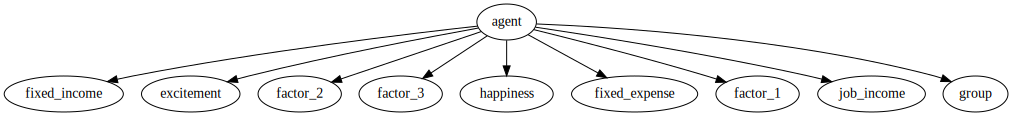

In [25]:
# draw return a graphviz `dot` object, which jupyter can render
power_world.draw()

This library seems tightly coupled with a prior knowledge of the model. We not have much information on the considered variables (nodes), in particular we lack the relationships (edges) between them.
If we try to generate the relationships, we don't have a good result:

In [26]:
power_world.get_all_independence_relationships()

[('fixed_income', 'excitement', {'agent'}),
 ('fixed_income', 'excitement', {'agent', 'factor_3'}),
 ('fixed_income', 'excitement', {'agent', 'factor_2'}),
 ('fixed_income', 'excitement', {'agent', 'happiness'}),
 ('fixed_income', 'excitement', {'agent', 'fixed_expense'}),
 ('fixed_income', 'excitement', {'agent', 'factor_1'}),
 ('fixed_income', 'excitement', {'agent', 'job_income'}),
 ('fixed_income', 'excitement', {'agent', 'group'}),
 ('fixed_income', 'excitement', {'agent', 'factor_2', 'factor_3'}),
 ('fixed_income', 'excitement', {'agent', 'factor_3', 'happiness'}),
 ('fixed_income', 'excitement', {'agent', 'factor_3', 'fixed_expense'}),
 ('fixed_income', 'excitement', {'agent', 'factor_1', 'factor_3'}),
 ('fixed_income', 'excitement', {'agent', 'factor_3', 'job_income'}),
 ('fixed_income', 'excitement', {'agent', 'factor_3', 'group'}),
 ('fixed_income', 'excitement', {'agent', 'factor_2', 'happiness'}),
 ('fixed_income', 'excitement', {'agent', 'factor_2', 'fixed_expense'}),
 ('f

This system seems quite large and relationships between nodes are not defined, for this reason we try to downscale to specific variables `agent`, `group`, `fixed_expense`, `fixed_expense`, `fixed_income`

In [27]:
power_world = CausalGraphicalModel(
    nodes=["agent", "group", "fixed_expense", "fixed_income", "job_income"],
    edges=[
        ("agent", "group"), 
        ("agent", "fixed_expense"), 
        ("agent", "fixed_income"),
        ("agent", "job_income") 
    ]
)

In the scope of the main question (how groups impact the social world), we try to evaluate the weight of group on other variables, using the Power World system previously defined.

In [28]:
# Trying 
print("Are agent and group unconditional independent? {} "
      .format(power_world.is_d_separated("agent", "group", {})))
print("Are agent and fixed_expense conditional independent when conditioning on group? {} "
      .format(power_world.is_d_separated("agent", "fixed_expense", {"group"})))
print("Are agent and fixed_income conditional independent when conditioning on group? {} "
      .format(power_world.is_d_separated("agent", "fixed_income", {"group"})))
print("Are agent and job_income conditional independent when conditioning on group? {} "
      .format(power_world.is_d_separated("agent", "job_income", {"group"})))

Are agent and group unconditional independent? False 
Are agent and fixed_expense conditional independent when conditioning on group? False 
Are agent and fixed_income conditional independent when conditioning on group? False 
Are agent and job_income conditional independent when conditioning on group? False 


The conclusion is that library `causalgraphical` has powerful methods, but we need much more information to model a system, before making causal inference.

As alternative approach, library `dowhy` (https://github.com/microsoft/dowhy) allows some causal inference, based on Pandas dataframe. Since we need to check how groups impact social world, we start creating a joined dataset, where fixed_expense, fixed_income, job_income values are related to groups. For this reason let's try to merge `p_TA2A_TA1B_0331_RR_R1_df` with `p_TA2A_TA1B_0351_RR_Journal_df`. The column `worked_for_group` will be equal to `1` if an agent has worked in a group in a specific date, `0` otherwise

In [29]:
merged_df = pd.merge(p_TA2A_TA1B_0331_RR_R1_df,p_TA2A_TA1B_0351_RR_Journal_df, on=['Timestep','EntityIdx'])
merged_df.head()

VariableName        fixed_expense  fixed_income  job_income  \
Timestep EntityIdx                                            
Day 375  agent0               0.9           0.6        0.90   
         agent1               0.9           0.6        0.90   
         agent10              1.4           0.6        0.90   
         agent11              1.3           0.6        0.64   
         agent13              1.3           0.6        0.63   

VariableName        group_work_percent  individual_work_percent  \
Timestep EntityIdx                                                
Day 375  agent0               0.000000                 1.000000   
         agent1               0.000000                 1.000000   
         agent10              0.000000                 1.000000   
         agent11              0.407771                 0.592229   
         agent13              0.305135                 0.694865   

VariableName        worked_for_group  
Timestep EntityIdx                    
Day 375  agent0                    0  
         agent1                    0  
         agent10                   0  
         agent11                   1  
         agent13                   1

In [30]:
flattened = pd.DataFrame(merged_df.to_records())
flattened.head()

,Timestep,EntityIdx,fixed_expense,fixed_income,job_income,group_work_percent,individual_work_percent,worked_for_group
0,Day 375,agent0,0.9,0.6,0.90,0.000000,1.000000,0
1,Day 375,agent1,0.9,0.6,0.90,0.000000,1.000000,0
2,Day 375,agent10,1.4,0.6,0.90,0.000000,1.000000,0
3,Day 375,agent11,1.3,0.6,0.64,0.407771,0.592229,1
4,Day 375,agent13,1.3,0.6,0.63,0.305135,0.694865,1


In [31]:
# loading dowhy
from dowhy.do_why import CausalModel

DoWhy models any causal inference problem in a workflow with four fundamental steps: `model`, `identify`, `estimate` and `refute`. 
A model is defined to check the causal effect of treatment `worked_for_group` on outcome `fixed_expense`

In [32]:
model= CausalModel(
        data=flattened,
        treatment='worked_for_group',
        outcome='fixed_expense',
        common_causes=['EntityIdx'])
model.view_model(layout="dot")

INFO:dowhy.do_why:Model to find the causal effect of treatment ['worked_for_group'] on outcome ['fixed_expense']
INFO:dowhy.causal_graph:Using Matplotlib for plotting
C:\Users\p.giannoccaro\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\p.giannoccaro\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


The following step in the dowhy workflow is `identify`

In [33]:
identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'EntityIdx']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n]  y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                              
─────────────────(Expectation(fixed_expense|EntityIdx))
dworked_for_group                                      
Estimand assumption 1, Unconfoundedness: If U→worked_for_group and U→fixed_expense then P(fixed_expense|worked_for_group,EntityIdx,U) = P(fixed_expense|worked_for_group,EntityIdx)
### Estimand : 2
Estimand name: iv
No such variable found!



After `identify` step, the `estimate` can be run.

In [34]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_stratification")

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: fixed_expense~worked_for_group+EntityIdx
C:\Users\p.giannoccaro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
print(estimate)
print("Causal Estimate is " + str(estimate.value))

*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                              
─────────────────(Expectation(fixed_expense|EntityIdx))
dworked_for_group                                      
Estimand assumption 1, Unconfoundedness: If U→worked_for_group and U→fixed_expense then P(fixed_expense|worked_for_group,EntityIdx,U) = P(fixed_expense|worked_for_group,EntityIdx)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: fixed_expense~worked_for_group+EntityIdx
## Estimate
Value: -0.000795755968168832

Causal Estimate is -0.000795755968168832


The last step is `refute`. The calculated causal estimate can be refuted using several approaches.

- random common cause variable

In [36]:
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: fixed_expense~worked_for_group+EntityIdx+w_random
C:\Users\p.giannoccaro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Refute: Add a Random Common Cause
Estimated effect:(-0.000795755968168832,)
New effect:(nan,)



C:\Users\p.giannoccaro\AppData\Local\Continuum\anaconda3\lib\site-packages\dowhy-0.1.1-py3.6.egg\dowhy\causal_estimators\propensity_score_stratification_estimator.py:79: RuntimeWarning: invalid value encountered in double_scalars


- unobserved common cause variable

In [37]:
res_unobserved=model.refute_estimate(identified_estimand, estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02)
print(res_unobserved)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: fixed_expense~worked_for_group+EntityIdx
C:\Users\p.giannoccaro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Refute: Add an Unobserved Common Cause
Estimated effect:(-0.000795755968168832,)
New effect:(0.009278479705233877,)



- treatment with a random (placebo) variable

In [38]:
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: fixed_expense~placebo+EntityIdx


Refute: Use a Placebo Treatment
Estimated effect:(-0.000795755968168832,)
New effect:(-0.005495813710099763,)



C:\Users\p.giannoccaro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- random subset of the data

In [39]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: fixed_expense~worked_for_group+EntityIdx
C:\Users\p.giannoccaro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Refute: Use a subset of data
Estimated effect:(-0.000795755968168832,)
New effect:(-0.003344481605350502,)



## Conclusions
This notebook was focused on reading provided data from TSV files, on data analysis and on investigating Causal Graphical libraries that can be useful in the requested scenarios. Depending on lack of very important data (events, elections, policies), this notebook just analyzes simple scenarios regading impact of groups on some other variables and compares two different Python libraries: `causalgraphicalmodels` and `dowhy`. Based on the considered scenario, `dowhy` seems easier to use than `causalgraphicalmodels` and more suited to the Power World data (low knowledge of relationships between variables). 
This analysis is not intended to be complete, but it should be a first step on selection of a causal Graphical library.